In [10]:
import subprocess

subprocess.run(['python', 'gen_stats.py'])

Running Simulation with task distribution estimation...
Saving stats in stats_with_learning.csv...
Running Simulation with fixed task distribution...
Saving stats in stats_without_learning.csv...


CompletedProcess(args=['python', 'gen_stats.py'], returncode=0)

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

plt.style.use('seaborn-v0_8-dark-palette')

df_learning = pd.read_csv("stats_with_learning.csv")
df = pd.read_csv("stats_without_learning.csv")

number_of_tasks = df["number_of_tasks"].iloc[0]

df = df.drop(["number_of_tasks"], axis=1)
df_learning = df_learning.drop(["number_of_tasks"], axis=1)

print("Stats with Task Distribution Estimation\n", df_learning)
print("Stats without Task Distribution Estimation\n", df)

Stats with Task Distribution Estimation
      time  costs  serv_times   runtimes
0       0      0    0.000000   2.388106
1       1    120    0.000000   2.388231
2       2    160    0.000000   2.388350
3       3    200    0.000000   2.388464
4       4    240    0.000000   2.388668
..    ...    ...         ...        ...
476   476  19120   50.892857  23.609112
477   477  19160   50.909853  23.659410
478   478  19200   50.926778  23.703012
479   479  19240   50.943633  23.742419
480   480  19280   50.966667  23.782675

[481 rows x 4 columns]
Stats without Task Distribution Estimation
      time  costs  serv_times   runtimes
0       0      0    0.000000   1.426067
1       1    120    0.000000   1.426182
2       2    160    0.000000   1.426296
3       3    200    0.000000   1.426408
4       4    240    0.000000   1.426518
..    ...    ...         ...        ...
474   474  19040   42.862869  27.175840
475   475  19080   42.880000  27.192508
476   476  19120   42.897059  27.265583
477   477  

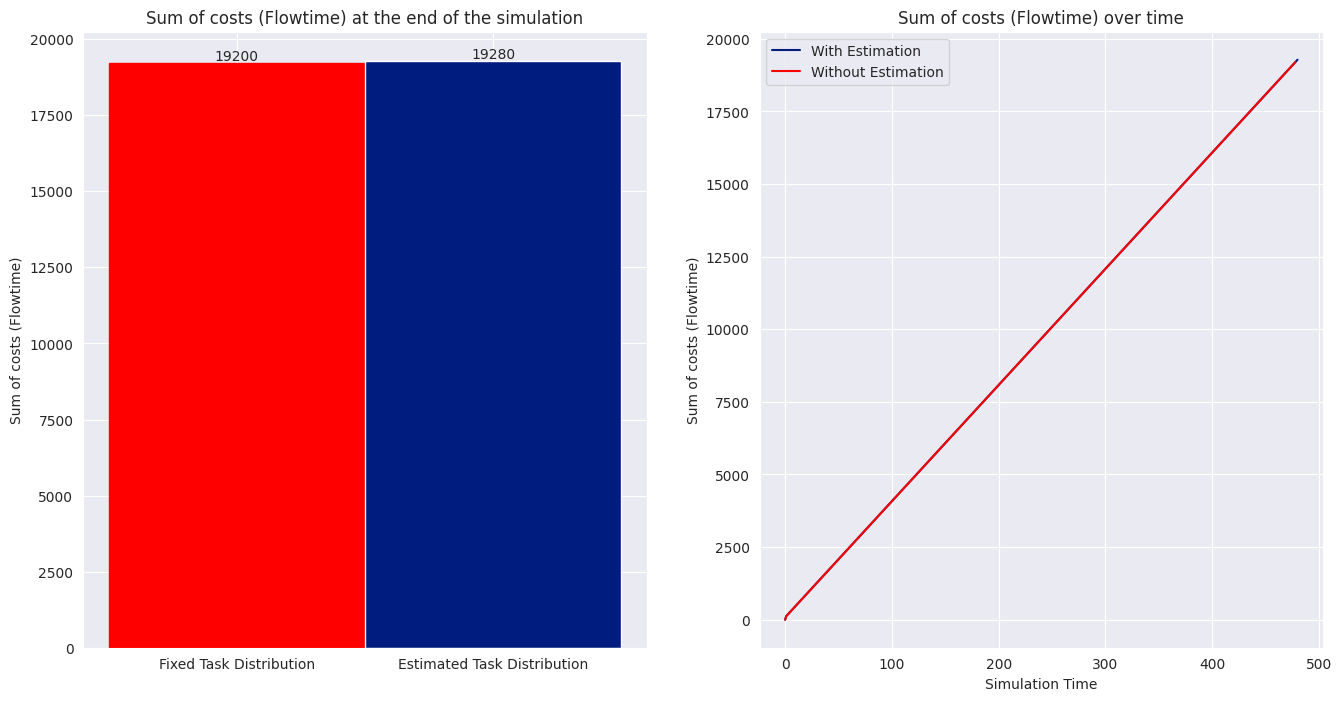

In [13]:
cost = df["costs"].iloc[-1]
cost_learning = df_learning["costs"].iloc[-1]

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

bars = ax[0].bar([0, 1], [cost, cost_learning], width=1, align='center')
ax[0].bar_label(bars, labels=[cost, cost_learning])
ax[0].set_xticks([0, 1], labels=['Fixed Task Distribution', 'Estimated Task Distribution'])
ax[0].set_title("Sum of costs (Flowtime) at the end of the simulation")
ax[0].set_ylabel("Sum of costs (Flowtime)")
bars[0].set_color('r')

ax[1].plot(df_learning["time"], df_learning["costs"], label="With Estimation")
ax[1].plot(df["time"], df["costs"], label="Without Estimation", color="r")
ax[1].set_title("Sum of costs (Flowtime) over time")
ax[1].set_xlabel("Simulation Time")
ax[1].set_ylabel("Sum of costs (Flowtime)")

ax[1].legend()

plt.show()

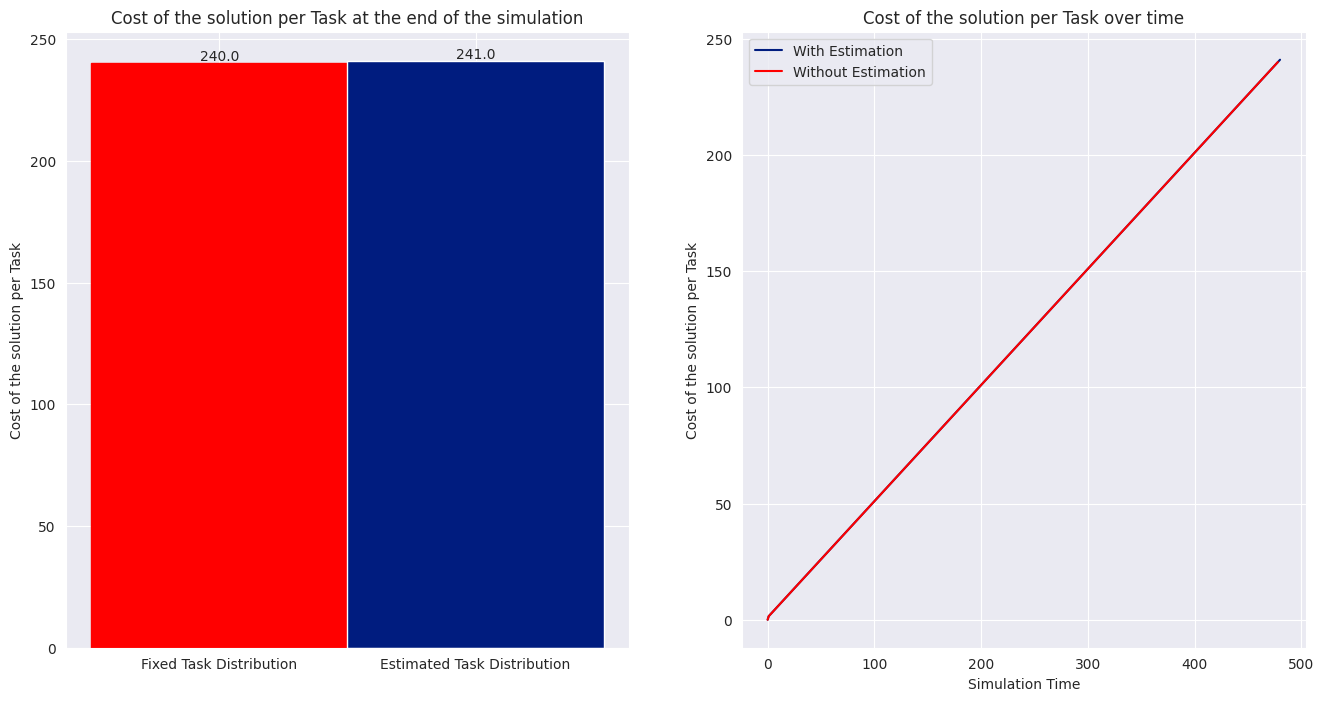

In [14]:
costs_per_task = df['costs'].apply(lambda x: x / number_of_tasks)
costs_per_task_learning  = df_learning['costs'].apply(lambda x: x / number_of_tasks)

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

bars = ax[0].bar([0, 1], [costs_per_task.iloc[-1], costs_per_task_learning.iloc[-1]], width=1, align='center')
ax[0].bar_label(bars, labels=[costs_per_task.iloc[-1], costs_per_task_learning.iloc[-1]])
ax[0].set_xticks([0, 1], labels=['Fixed Task Distribution', 'Estimated Task Distribution'])
ax[0].set_title("Cost of the solution per Task at the end of the simulation")
ax[0].set_ylabel("Cost of the solution per Task")
bars[0].set_color('r')

ax[1].plot(df_learning["time"], costs_per_task_learning, label="With Estimation")
ax[1].plot(df["time"], costs_per_task, label="Without Estimation", color="r")
ax[1].set_title("Cost of the solution per Task over time")
ax[1].set_xlabel("Simulation Time")
ax[1].set_ylabel("Cost of the solution per Task")

ax[1].legend()

plt.show()

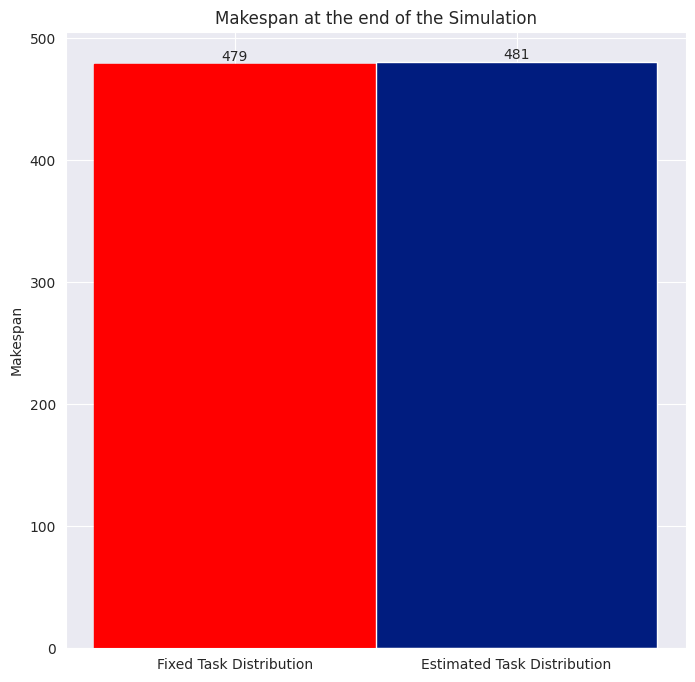

In [15]:
makespan = df["time"].iloc[-1] + 1
makespan_learning = df_learning["time"].iloc[-1] + 1

plt.figure(figsize=(8, 8))

bars = plt.bar([0, 1], [makespan, makespan_learning], width=1, align='center')
plt.bar_label(bars, labels=[makespan, makespan_learning])
plt.xticks([0, 1], labels=['Fixed Task Distribution', 'Estimated Task Distribution'])
bars[0].set_color('r')
plt.title("Makespan at the end of the Simulation")
plt.ylabel("Makespan")

plt.show()

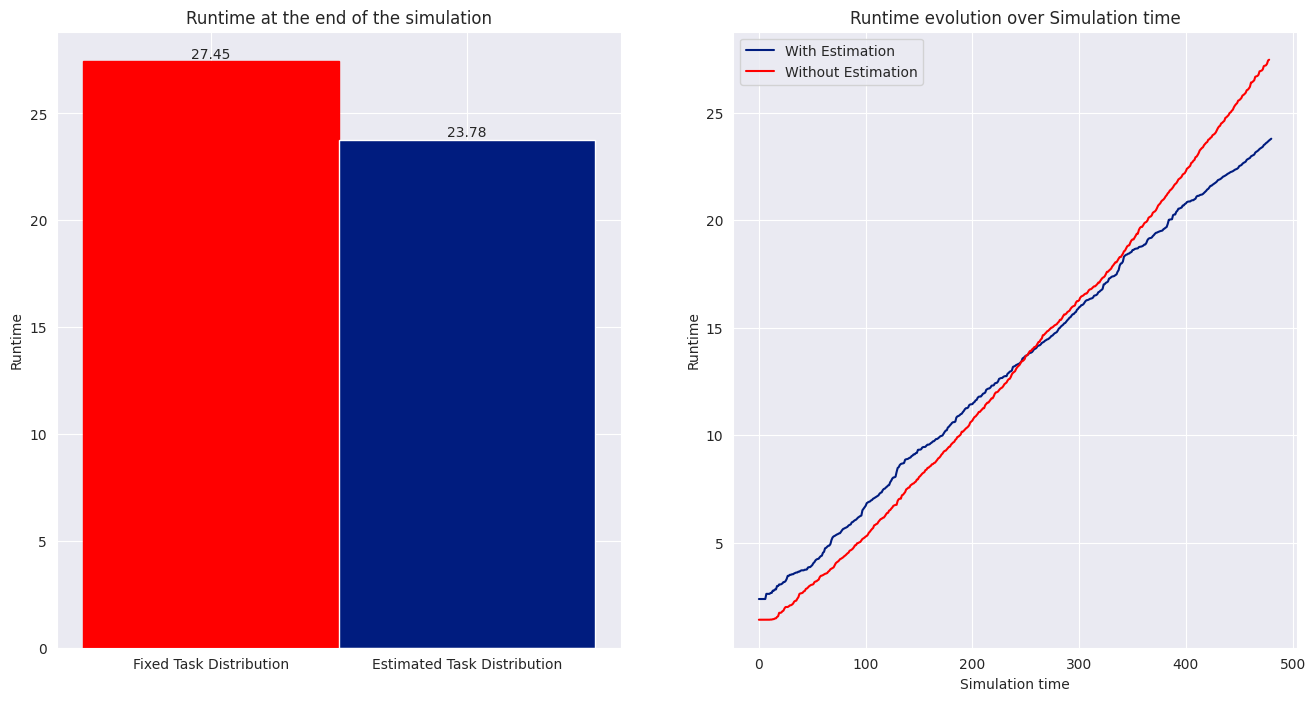

In [16]:
runtime = df["runtimes"].iloc[-1]
runtime_learning = df_learning["runtimes"].iloc[-1]

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

bars = ax[0].bar([0, 1], [runtime, runtime_learning], width=1, align='center')
ax[0].bar_label(bars, labels=["{:.2f}".format(runtime), "{:.2f}".format(runtime_learning)])
bars[0].set_color('r')
ax[0].set_title("Runtime at the end of the simulation")
ax[0].set_ylabel("Runtime")
ax[0].set_xticks([0, 1], labels=['Fixed Task Distribution', 'Estimated Task Distribution'])

ax[1].plot(df_learning["time"], df_learning["runtimes"], label="With Estimation")
ax[1].plot(df["time"], df["runtimes"], label="Without Estimation", color="r")
ax[1].set_title("Runtime evolution over Simulation time")
ax[1].set_xlabel('Simulation time')
ax[1].set_ylabel("Runtime")

ax[1].legend()

plt.show()

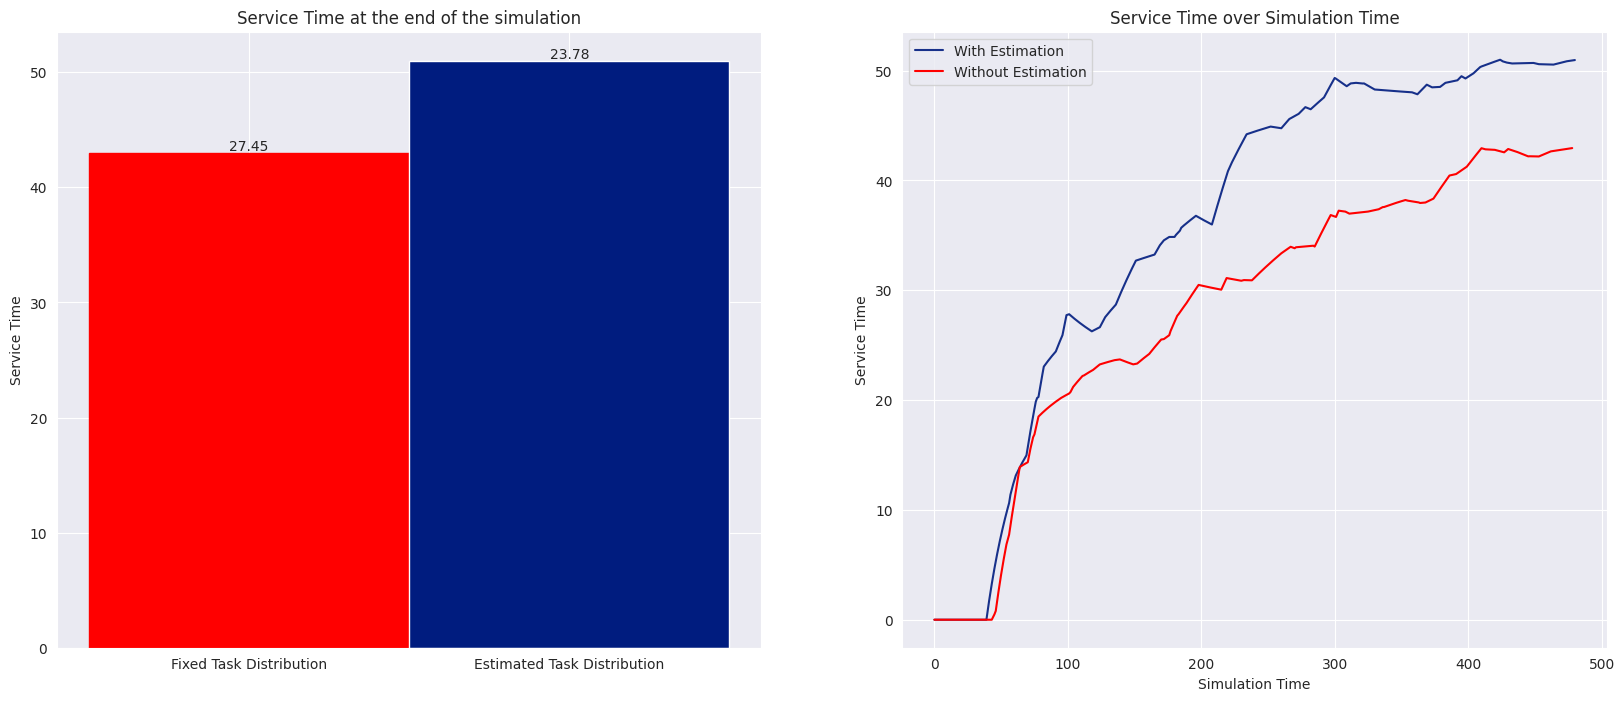

In [21]:
_, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

bars = ax[0].bar([0, 1], [df["serv_times"].iloc[-1], df_learning["serv_times"].iloc[-1]], width=1, align='center')
ax[0].bar_label(bars, labels=["{:.2f}".format(runtime), "{:.2f}".format(runtime_learning)])
bars[0].set_color('r')
ax[0].set_title("Service Time at the end of the simulation")
ax[0].set_ylabel("Service Time")
ax[0].set_xticks([0, 1], labels=['Fixed Task Distribution', 'Estimated Task Distribution'])

ax[1].plot(df_learning["time"], df_learning["serv_times"], label="With Estimation", alpha=0.9)
ax[1].plot(df["time"], df["serv_times"], label="Without Estimation", color="r")
ax[1].set_ylabel('Service Time')
ax[1].set_xlabel('Simulation Time')
ax[1].set_title('Service Time over Simulation Time')

ax[1].legend(loc="upper left")

plt.show()